# Build a neural network for the MNIST dataset using NumPy

In [1]:
from io import BytesIO
import gzip
import matplotlib.pyplot as plt
import numpy as np
import pickle
import requests
from utils import learn_mnist, plot_learning
%matplotlib inline

## Access the MNIST data

In [4]:
def read_mnist(dataset='train', flatten=True):
    """Return an iterator of images and labels.

    Returns an iterator of 2-tuples with the first element a
    numpy.float32 array of pixel data for the given image and
    the second element the correspnding label as numpy.int64.

    If flatten, each image array has shape (784,), otherwise
    each image array has shape (28, 28).
    """
    MNIST_PATH = ('http://www.iro.umontreal.ca/~lisa'
                  '/deep/data/mnist/mnist.pkl.gz')
    response = requests.get(MNIST_PATH)
    content = BytesIO(response.content)
    with gzip.open(content, 'rb') as f:
        train_set, valid_set, test_set = pickle.load(f, encoding='bytes')

    if 'train' in dataset.lower():
        images, labels = train_set
    elif 'valid' in dataset.lower():
        images, labels = valid_set
    elif 'test' in dataset.lower():
        images, labels = test_set
    else:
        raise ValueError("dataset must be 'train', 'valid' or 'test'. "
                         "Got '{}'".format(dataset))
    if not flatten:
        images = images.reshape(-1, 28, 28)

    return images, labels

In [6]:
## Task 1: Print the data for a single image as an array
##
Data, Labels = read_mnist()

In [7]:
print(Data[0])
print(Labels[0])

[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.

In [8]:
## Task 2: Print the dimensions of the three datasets training, validation and testing
##
from sklearn.model_selection import train_test_split
X_train, X_tp, Y_train, Y_tp = train_test_split(Data, Labels, 
                                                test_size = 0.4, random_state = 42)
X_cv, X_test, Y_cv, Y_test = train_test_split(X_tp, Y_tp, 
                                                test_size = 0.5, random_state = 42)
del X_tp, Y_tp
print(X_train.shape)
print(X_cv.shape)
print(X_test.shape)

(30000, 784)
(10000, 784)
(10000, 784)


In [10]:
def show(image, label=None):
    """Render a given numpy.float32 array of pixel data."""
    fig, ax = plt.subplots()
    plot = ax.imshow(image.reshape(28, 28),
                     cmap=plt.cm.gray)
    plot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    # ensure label 0 is not passed as False
    if label or label == 0.:
        ax.set_xlabel("Label: {}".format(label),
                      size=14)
    plt.show()

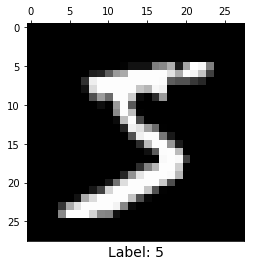

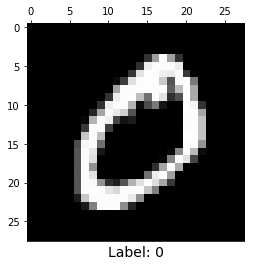

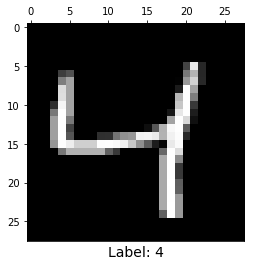

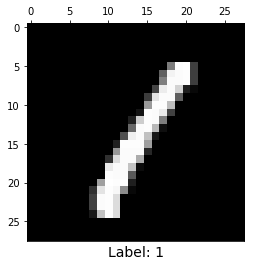

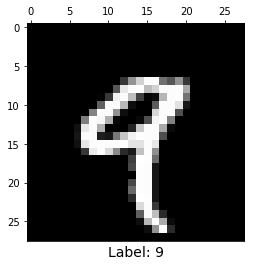

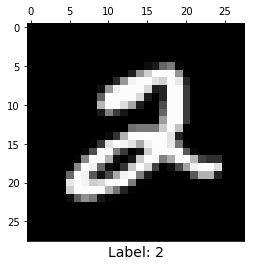

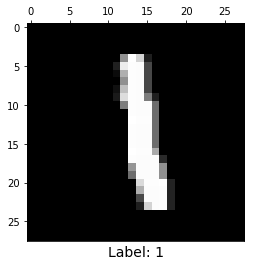

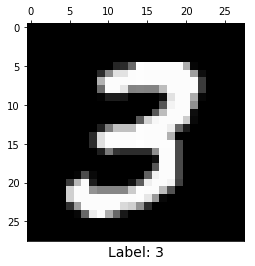

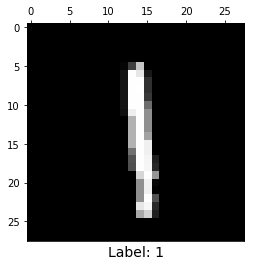

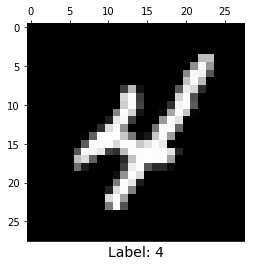

In [12]:
## Task 3: Plot the first ten images of the training data
##
for k in range(10):
    show(Data[k],label = Labels[k])

## Define the neural network

In [70]:
def neural_network_prediction(x, W, b):
    """This is the entire neural net!"""
    ## Task 4: complete the neural network 
    #h = W*x + b
    y_scores = 1/(1+np.exp(np.dot(x,W)+b))
    prediction = softmax(y_scores.flatten())
    return np.argmax(prediction)


def softmax(z):
    """Return the softmax of vector z.

    The softmax returns normalized positive values.
    It is defined as softmax(z_i) = normalise(exp(z_i))
    = \\frac{exp(z_i)}{\sum_j exp(z_j)}.
    """
    z -= np.max(z)  # for numerical stability
    exps = np.exp(z)
    return np.divide(exps, np.sum(exps))

## Run the network

### Load data
first, let's load our data

In [48]:
X_train, Y_train = read_mnist("train")

...and confirm the data is as we expect

In [49]:
img, label = (X_train[0], Y_train[0])
print("""A single example in our dataset =
    a vector of length {} with values between {} and {},
    and a corresponding digit label like '{}'""".format(img.shape,
                                                        img.min(), img.max(),
                                                        label))

A single example in our dataset =
    a vector of length (784,) with values between 0.0 and 0.99609375,
    and a corresponding digit label like '5'


### Predict
Now, let's check the neural network function runs.

In [73]:
# randomly initialise params to values between -0.5 and 0.5
W1 = np.random.random((784, 10)) - 0.5
b1 = np.random.random((1, 10)) - 0.5

In [74]:
# generate a prediction for a single example
label_predicted = neural_network_prediction(img, W1, b1)

In [76]:
label

5

### Evaluate
If we successfully outputted a prediction, let's see if the prediction is correct

In [77]:
def correct(y, y_pred):
    '''Check if y_pred equals y.'''
    ## Task 5: write a function is check if your prediction is correct
    
    is_correct = y_pred == y
    return is_correct

print(correct(label, label_predicted))

False


...and finally how accurate the network is on the test set

In [78]:
def error_rate_mnist(W, b, dataset='test'):
    """Calculate the error rate."""
    data_seen = 0.
    total_correct = 0.
    total_errors = 0.

    x_data, y_data = read_mnist(dataset)
    for x, y in zip(x_data, y_data):
        y_pred = np.argmax(neural_network_prediction(x, W, b))
        if y_pred == y:
            total_correct += 1
        else:
            total_errors += 1
        data_seen += 1

    return total_errors / data_seen

We expect ~90% error rate for random parameters if each digit 0-9 is represented equally in the dataset 

In [80]:
# Task 6: Print the error rate for your network over the test set
error_rate_mnist(W1, b1, dataset='test')

0.902

### If you complete all 6 tasks, here's a 'black box' function to experiment with

In [97]:
# try getting the neural network to learn by changing the iterations, learning rate and batch size 
W_learned, b_learned, losses, train_errors, test_errors = learn_mnist(W=np.random.random((784, 10)) - 0.5, 
                                                                      b=np.random.random((1, 10)) - 0.5, 
                                                                      max_iters= 20000,
                                                                      learning_rate= 0.9, 
                                                                      batch_size=5)

Iteration 0 | Loss: 0.0028 | Train error: 0.8950 | Test error: 0.8955 | Total run time: 12.1s
Iteration 2000 | Loss: 2.6182 | Train error: 0.1891 | Test error: 0.1774 | Total run time: 20.6s
Iteration 4000 | Loss: 2.2124 | Train error: 0.1534 | Test error: 0.1451 | Total run time: 28.8s
Iteration 6000 | Loss: 2.0314 | Train error: 0.1536 | Test error: 0.1434 | Total run time: 36.8s
Iteration 8000 | Loss: 2.2138 | Train error: 0.1619 | Test error: 0.1498 | Total run time: 44.5s
Iteration 10000 | Loss: 2.5481 | Train error: 0.1882 | Test error: 0.1785 | Total run time: 52.4s
Iteration 12000 | Loss: 2.4347 | Train error: 0.1878 | Test error: 0.1749 | Total run time: 60.2s
Iteration 14000 | Loss: 3.1384 | Train error: 0.1589 | Test error: 0.1494 | Total run time: 68.0s
Iteration 16000 | Loss: 3.1623 | Train error: 0.1618 | Test error: 0.1519 | Total run time: 75.8s
Iteration 18000 | Loss: 3.1767 | Train error: 0.1474 | Test error: 0.1388 | Total run time: 85.1s
Iteration 20000 | Loss: 2.36

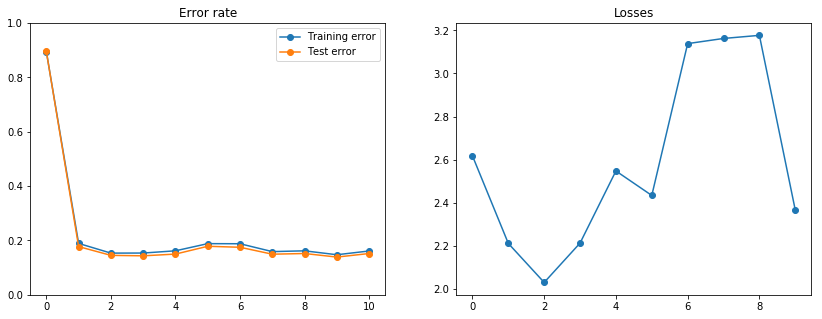

In [98]:
# See how the black box is learning
plot_learning(losses[1:], train_errors, test_errors)

In [93]:
W_learned, b_learned, losses, train_errors, test_errors = learn_mnist(W=W1, b=b1, 
                                                                      max_iters=100000,
                                                                      learning_rate=.5, 
                                                                      batch_size=100)

Iteration 0 | Loss: 0.0006 | Train error: 0.9009 | Test error: 0.8994 | Total run time: 11.3s
Iteration 10000 | Loss: 1.0424 | Train error: 0.1954 | Test error: 0.1828 | Total run time: 20.3s
Iteration 20000 | Loss: 0.8250 | Train error: 0.1731 | Test error: 0.1620 | Total run time: 29.1s
Iteration 30000 | Loss: 0.8316 | Train error: 0.1524 | Test error: 0.1434 | Total run time: 38.9s
Iteration 40000 | Loss: 0.9698 | Train error: 0.1408 | Test error: 0.1327 | Total run time: 47.7s
Iteration 50000 | Loss: 1.0027 | Train error: 0.1503 | Test error: 0.1411 | Total run time: 64.7s
Iteration 60000 | Loss: 0.9625 | Train error: 0.1420 | Test error: 0.1330 | Total run time: 77.9s
Iteration 70000 | Loss: 1.1535 | Train error: 0.1430 | Test error: 0.1354 | Total run time: 87.2s
Iteration 80000 | Loss: 1.1241 | Train error: 0.1392 | Test error: 0.1307 | Total run time: 96.2s
Iteration 90000 | Loss: 1.2539 | Train error: 0.1333 | Test error: 0.1274 | Total run time: 105.8s
Iteration 100000 | Loss

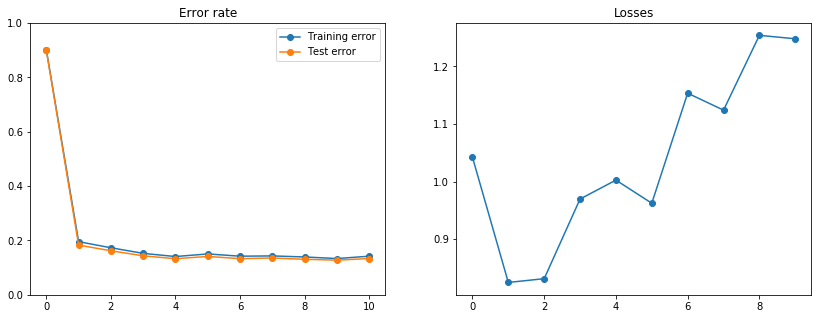

In [94]:
plot_learning(losses[1:], train_errors, test_errors)

In [88]:
learn_mnist?